## Predicting the User Rating of Mobile Games using Machine Learning Model



    

The mobile gaming industry is one of the most important fields in the world. It's worth billion dollars. So, companies spend a lot of money on developing and marketing these games. The mobile gaming industry is one of the most important fields in the world. It's worth billion dollars. So, companies spend a lot of money on developing and marketing these games. In addition, there are a lot of investors in this field.
This field motivated me to do this project.


In this project, a huge real dataset will be used to help developers when they create and develop their games to get a high rating.



**The purpose of this project** is to do exploratory data analysis (EDA) and using machine learning models to help game developers to predict the user rating of their games before they are published or predict user rating after they are developed their games.


## Dataset
### 187k App Store Games dataset

187k App Store Games dataset will be used in this project. it’s Kaggle open dataset that contains 187k unique games & 23 features. It's a CSV file. [Link](https://www.kaggle.com/artyomkolas/187k-appstore-games)

These are features will be used 'name_app', 'developer', 'age_rating', 'size', 'price', 'purchases', 'languages', 'sub_category', 'version_count', 'rating_avg', 'rating_count' 


###  Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Extract and Preliminarily explore the dataset

In [2]:
# load in the dataset into a pandas dataframe
appstore_games_df = pd.read_csv('appstore_games_march_2021.csv')

In [3]:
appstore_games_df.head()

,Unnamed: 0,id,name_app,developer,age_rating,size,price,purchases,languages,category,...,watch,ipad,ipod,iphone,tv,mac,url,icon_url,rating_avg,rating_count
0,0,1221248388,Donut Abc Learning Animals And Letters Gam‪e‬,Anchalee Pradissook,4+,191.6 MB,Free,No,English,Games,...,0,1,1,1,0,0,https://apps.apple.com/us/app/donut-abc-learni...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,5.0,1
1,1,1302771128,AR Cube‪s‬,Alkis Hadjinicolaou,4+,20 MB,$0.99,No,English,Games,...,0,0,1,1,0,0,https://apps.apple.com/us/app/ar-cubes/id13027...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,0.0,0
2,2,1535473269,Zoo Memorie‪s‬,Valerii Kot,4+,46.7 MB,Free,No,English,Games,...,0,1,1,1,0,0,https://apps.apple.com/us/app/zoo-memories/id1...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,0.0,0
3,3,1490641095,Kelsi Davies: Haunt Escap‪e‬,Aaron Hibberd,12+,188 MB,Free,Yes,English,Games,...,0,1,1,1,0,0,https://apps.apple.com/us/app/kelsi-davies-hau...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.9,116
4,4,1128166384,The Tower Blocks: Free Building Blocken Stack ...,Pruettanon Rattanalaoo,4+,7.6 MB,Free,No,English,Games,...,0,1,1,1,0,0,https://apps.apple.com/us/app/the-tower-blocks...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,2


In [4]:
# print shape
appstore_games_df.shape

(187907, 24)

In [5]:
appstore_games_df.id.nunique()

187907

In [6]:
# print shape
appstore_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187907 entries, 0 to 187906
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         187907 non-null  int64  
 1   id                 187907 non-null  int64  
 2   name_app           187907 non-null  object 
 3   developer          187907 non-null  object 
 4   age_rating         187907 non-null  object 
 5   size               187905 non-null  object 
 6   price              187768 non-null  object 
 7   purchases          187731 non-null  object 
 8   languages          187087 non-null  object 
 9   category           187907 non-null  object 
 10  sub_category       129776 non-null  object 
 11  release_date       126886 non-null  object 
 12  last_version_date  126886 non-null  object 
 13  version_count      126886 non-null  float64
 14  watch              187907 non-null  int64  
 15  ipad               187907 non-null  int64  
 16  ip

In [7]:
# print describe of numerical columns
appstore_games_df.describe()

,Unnamed: 0,id,version_count,watch,ipad,ipod,iphone,tv,mac,rating_avg
count,187907.000000,1.879070e+05,126886.000000,187907.000000,187907.000000,187907.000000,187907.000000,187907.000000,187907.000000,187907.000000
mean,93953.000000,1.193945e+09,4.428054,0.002411,0.886737,0.960821,0.960922,0.010090,0.247654,2.666834
std,54244.222854,3.003843e+08,5.648048,0.049040,0.316915,0.194021,0.193781,0.099942,0.431651,2.075853
min,0.000000,2.817365e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46976.500000,1.029854e+09,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,93953.000000,1.230302e+09,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.500000
75%,140929.500000,1.462331e+09,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.600000
max,187906.000000,1.544829e+09,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [8]:
# print missing values in each columns
appstore_games_df.isnull().sum() 

Unnamed: 0               0
id                       0
name_app                 0
developer                0
age_rating               0
size                     2
price                  139
purchases              176
languages              820
category                 0
sub_category         58131
release_date         61021
last_version_date    61021
version_count        61021
watch                    0
ipad                     0
ipod                     0
iphone                   0
tv                       0
mac                      0
url                      0
icon_url                 0
rating_avg               0
rating_count             0
dtype: int64

## Clean the dataset
This includes:
Removing duplicate or unnecessary data
Fixing inconsistencies and typos
Dealing missing data



1. Dropping unused columns and renaming the columns

In [9]:
# print columns of df
appstore_games_df.columns

Index(['Unnamed: 0', 'id', 'name_app', 'developer', 'age_rating', 'size',
       'price', 'purchases', 'languages', 'category', 'sub_category',
       'release_date', 'last_version_date', 'version_count', 'watch', 'ipad',
       'ipod', 'iphone', 'tv', 'mac', 'url', 'icon_url', 'rating_avg',
       'rating_count'],
      dtype='object')

In [10]:
# Copy the df to clean_games_df
clean_games_df=appstore_games_df.copy()

In [11]:
# Drop unused columns
clean_games_df.drop(columns=['Unnamed: 0', 'id','url', 'icon_url', 'watch', 'tv', 'mac'], inplace=True)

In [12]:
# Rename columns
clean_games_df.columns= ['Name_App', 'Developer', 'Age_Rating', 'Size', 'Price', 'Purchases', 'Languages',
                         'Category', 'Sub_Category', 'Release_Date', 'Rast_Version_Date', 'Version_Count', 'Ipad',
                         'Ipod', 'Iphone','Rating_Avg','Rating_Count']
clean_games_df.head(5)

,Name_App,Developer,Age_Rating,Size,Price,Purchases,Languages,Category,Sub_Category,Release_Date,Rast_Version_Date,Version_Count,Ipad,Ipod,Iphone,Rating_Avg,Rating_Count
0,Donut Abc Learning Animals And Letters Gam‪e‬,Anchalee Pradissook,4+,191.6 MB,Free,No,English,Games,Games,2017-03-31,2017-03-31,1.0,1,1,1,5.0,1
1,AR Cube‪s‬,Alkis Hadjinicolaou,4+,20 MB,$0.99,No,English,Games,Action,2018-08-23,2018-08-22,1.0,0,1,1,0.0,0
2,Zoo Memorie‪s‬,Valerii Kot,4+,46.7 MB,Free,No,English,Games,Puzzle,2020-10-13,2020-10-13,1.0,1,1,1,0.0,0
3,Kelsi Davies: Haunt Escap‪e‬,Aaron Hibberd,12+,188 MB,Free,Yes,English,Games,Adventure,2020-10-02,2020-10-16,2.0,1,1,1,4.9,116
4,The Tower Blocks: Free Building Blocken Stack ...,Pruettanon Rattanalaoo,4+,7.6 MB,Free,No,English,Games,Strategy,2016-06-28,2016-09-17,2.0,1,1,1,3.5,2


In [13]:
clean_games_df.columns

Index(['Name_App', 'Developer', 'Age_Rating', 'Size', 'Price', 'Purchases',
       'Languages', 'Category', 'Sub_Category', 'Release_Date',
       'Rast_Version_Date', 'Version_Count', 'Ipad', 'Ipod', 'Iphone',
       'Rating_Avg', 'Rating_Count'],
      dtype='object')

2. dropping with missing values

In [14]:
appstore_games_df.isnull().sum()

Unnamed: 0               0
id                       0
name_app                 0
developer                0
age_rating               0
size                     2
price                  139
purchases              176
languages              820
category                 0
sub_category         58131
release_date         61021
last_version_date    61021
version_count        61021
watch                    0
ipad                     0
ipod                     0
iphone                   0
tv                       0
mac                      0
url                      0
icon_url                 0
rating_avg               0
rating_count             0
dtype: int64

In [15]:
clean_games_df.dropna(inplace=True)

3. Counting and saving languages supported by the app of game in a new column

In [16]:
 clean_games_df.Languages.value_counts()

English                                                                                                                                                              99463
English, Simplified Chinese                                                                                                                                           2127
English, Japanese                                                                                                                                                     1826
English, Simplified Chinese, Traditional Chinese                                                                                                                      1368
English, Czech, Dutch, French, German, Italian, Japanese, Korean, Polish, Portuguese, Russian, Simplified Chinese, Spanish, Swedish, Traditional Chinese, Turkish     1326
                                                                                                                                                 

In [17]:
clean_games_df['LNGs_InApp'] = clean_games_df.Languages.dropna().str.count(',')+1
clean_games_df['LNGs_InApp'] = clean_games_df['LNGs_InApp'].astype(int)
clean_games_df.head()

,Name_App,Developer,Age_Rating,Size,Price,Purchases,Languages,Category,Sub_Category,Release_Date,Rast_Version_Date,Version_Count,Ipad,Ipod,Iphone,Rating_Avg,Rating_Count,LNGs_InApp
0,Donut Abc Learning Animals And Letters Gam‪e‬,Anchalee Pradissook,4+,191.6 MB,Free,No,English,Games,Games,2017-03-31,2017-03-31,1.0,1,1,1,5.0,1,1
1,AR Cube‪s‬,Alkis Hadjinicolaou,4+,20 MB,$0.99,No,English,Games,Action,2018-08-23,2018-08-22,1.0,0,1,1,0.0,0,1
2,Zoo Memorie‪s‬,Valerii Kot,4+,46.7 MB,Free,No,English,Games,Puzzle,2020-10-13,2020-10-13,1.0,1,1,1,0.0,0,1
3,Kelsi Davies: Haunt Escap‪e‬,Aaron Hibberd,12+,188 MB,Free,Yes,English,Games,Adventure,2020-10-02,2020-10-16,2.0,1,1,1,4.9,116,1
4,The Tower Blocks: Free Building Blocken Stack ...,Pruettanon Rattanalaoo,4+,7.6 MB,Free,No,English,Games,Strategy,2016-06-28,2016-09-17,2.0,1,1,1,3.5,2,1


4. converting `Purchases` column to numerical column

In [18]:
#Function that converts the Purchases into two types value to '0' for No app and '1' for yes
def type_pur(Purchases):
    if Purchases == 'No':
        return 0
    else:
        return 1

clean_games_df['Purchases'] = clean_games_df['Purchases'].map(type_pur) #updated type value
clean_games_df.head()

,Name_App,Developer,Age_Rating,Size,Price,Purchases,Languages,Category,Sub_Category,Release_Date,Rast_Version_Date,Version_Count,Ipad,Ipod,Iphone,Rating_Avg,Rating_Count,LNGs_InApp
0,Donut Abc Learning Animals And Letters Gam‪e‬,Anchalee Pradissook,4+,191.6 MB,Free,0,English,Games,Games,2017-03-31,2017-03-31,1.0,1,1,1,5.0,1,1
1,AR Cube‪s‬,Alkis Hadjinicolaou,4+,20 MB,$0.99,0,English,Games,Action,2018-08-23,2018-08-22,1.0,0,1,1,0.0,0,1
2,Zoo Memorie‪s‬,Valerii Kot,4+,46.7 MB,Free,0,English,Games,Puzzle,2020-10-13,2020-10-13,1.0,1,1,1,0.0,0,1
3,Kelsi Davies: Haunt Escap‪e‬,Aaron Hibberd,12+,188 MB,Free,1,English,Games,Adventure,2020-10-02,2020-10-16,2.0,1,1,1,4.9,116,1
4,The Tower Blocks: Free Building Blocken Stack ...,Pruettanon Rattanalaoo,4+,7.6 MB,Free,0,English,Games,Strategy,2016-06-28,2016-09-17,2.0,1,1,1,3.5,2,1


5. converting `Size` to be in B in new column call `Size_B` and droping `Size` column

In [19]:
#pd.set_option('display.max_rows', None)
clean_games_df.Size.value_counts().sort_values()

687.5 MB      1
570.2 MB      1
758 MB        1
378.4 MB      1
961.2 MB      1
           ... 
12.3 MB     143
22.2 MB     150
1.2 GB      153
1.1 GB      154
16 MB       161
Name: Size, Length: 6955, dtype: int64

In [20]:
#function to convert MB and GB in byet float type
def change_size(size):
    if 'MB' in size:
        x = size[:-2]
        x = float(x)*1000000
        return(x)
    elif 'KB' == size[-1:]:
        x = size[:-2]
        x = float(x)*1000
        return(x)
    elif 'GB' == size[-1:]:
        x = size[:-2]
        x = float(x)*1000000000
        return(x)
    else:
        return None
#update the Size column with these new values using map function
clean_games_df["Size_B"]=clean_games_df["Size"].map(change_size) 
clean_games_df.drop(columns=['Size'], inplace=True)

In [21]:
clean_games_df.head()

,Name_App,Developer,Age_Rating,Price,Purchases,Languages,Category,Sub_Category,Release_Date,Rast_Version_Date,Version_Count,Ipad,Ipod,Iphone,Rating_Avg,Rating_Count,LNGs_InApp,Size_B
0,Donut Abc Learning Animals And Letters Gam‪e‬,Anchalee Pradissook,4+,Free,0,English,Games,Games,2017-03-31,2017-03-31,1.0,1,1,1,5.0,1,1,191600000.0
1,AR Cube‪s‬,Alkis Hadjinicolaou,4+,$0.99,0,English,Games,Action,2018-08-23,2018-08-22,1.0,0,1,1,0.0,0,1,20000000.0
2,Zoo Memorie‪s‬,Valerii Kot,4+,Free,0,English,Games,Puzzle,2020-10-13,2020-10-13,1.0,1,1,1,0.0,0,1,46700000.0
3,Kelsi Davies: Haunt Escap‪e‬,Aaron Hibberd,12+,Free,1,English,Games,Adventure,2020-10-02,2020-10-16,2.0,1,1,1,4.9,116,1,188000000.0
4,The Tower Blocks: Free Building Blocken Stack ...,Pruettanon Rattanalaoo,4+,Free,0,English,Games,Strategy,2016-06-28,2016-09-17,2.0,1,1,1,3.5,2,1,7600000.0


6. Removeing '+' sign from `Age_Rating` and convert it to numerical values

In [22]:
clean_games_df['Age_Rating'] = clean_games_df['Age_Rating'].str.replace('+','')
clean_games_df['Age_Rating'] = pd.to_numeric(clean_games_df['Age_Rating'])
clean_games_df.head(3)

/Users/wejdanalsaadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,Name_App,Developer,Age_Rating,Price,Purchases,Languages,Category,Sub_Category,Release_Date,Rast_Version_Date,Version_Count,Ipad,Ipod,Iphone,Rating_Avg,Rating_Count,LNGs_InApp,Size_B
0,Donut Abc Learning Animals And Letters Gam‪e‬,Anchalee Pradissook,4,Free,0,English,Games,Games,2017-03-31,2017-03-31,1.0,1,1,1,5.0,1,1,191600000.0
1,AR Cube‪s‬,Alkis Hadjinicolaou,4,$0.99,0,English,Games,Action,2018-08-23,2018-08-22,1.0,0,1,1,0.0,0,1,20000000.0
2,Zoo Memorie‪s‬,Valerii Kot,4,Free,0,English,Games,Puzzle,2020-10-13,2020-10-13,1.0,1,1,1,0.0,0,1,46700000.0


7. Removing '$' sign from `Price`, replace 'Size' value to None and drop it, convert `Price` to numerical values

In [23]:
#pd.set_option('display.max_rows', None)
clean_games_df.Price.value_counts().sort_values()

$25.99          1
$174.99         1
$109.99         1
$30.99          1
$27.99          1
$44.99          1
$39.99          1
$31.99          1
$199.99         1
$32.99          1
$18.99          2
$35.99          2
$49.99          2
$21.99          2
$54.99          3
$99.99          4
$10.99          4
$22.99          4
$94.99          5
$24.99          6
Size            6
$16.99          6
$29.99          7
$23.99          8
$12.99          9
$17.99          9
$15.99          9
$26.99          9
$13.99         13
$11.99         17
$19.99         24
$14.99         26
$8.99          30
$7.99          72
$9.99         108
$5.99         167
$6.99         271
$3.99         587
$4.99         702
$2.99        1438
$1.99        2217
$0.99        4236
Free       116187
Name: Price, dtype: int64

In [24]:
clean_games_df['Price'] = clean_games_df['Price'].str.replace('$','')
clean_games_df['Price'] = clean_games_df['Price'].replace('Size',np.nan)
clean_games_df['Price'] = clean_games_df['Price'].str.replace('Free','0')
clean_games_df.dropna(subset=['Price'],inplace=True)
clean_games_df['Price'] = pd.to_numeric(clean_games_df['Price'])
clean_games_df.head(3)

/Users/wejdanalsaadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,Name_App,Developer,Age_Rating,Price,Purchases,Languages,Category,Sub_Category,Release_Date,Rast_Version_Date,Version_Count,Ipad,Ipod,Iphone,Rating_Avg,Rating_Count,LNGs_InApp,Size_B
0,Donut Abc Learning Animals And Letters Gam‪e‬,Anchalee Pradissook,4,0.00,0,English,Games,Games,2017-03-31,2017-03-31,1.0,1,1,1,5.0,1,1,191600000.0
1,AR Cube‪s‬,Alkis Hadjinicolaou,4,0.99,0,English,Games,Action,2018-08-23,2018-08-22,1.0,0,1,1,0.0,0,1,20000000.0
2,Zoo Memorie‪s‬,Valerii Kot,4,0.00,0,English,Games,Puzzle,2020-10-13,2020-10-13,1.0,1,1,1,0.0,0,1,46700000.0


8. converting `Rating_Count` to be numerical values by replacing 'GB', 'MB' and 'KB'

In [25]:
#pd.set_option('display.max_rows', None)
clean_games_df.Rating_Count.value_counts().sort_values()

183.7K        1
49.8K         1
389.8K        1
133K          1
55.5K         1
          ...  
4          4177
3          6298
2         10104
1         18932
0         41293
Name: Rating_Count, Length: 1905, dtype: int64

In [26]:
#function to convert MB and KB in bytes
def change_Rating_Count(Rating_Count):
    if 'K' in Rating_Count:
        x = Rating_Count[:-1]
        x = float(x)*1000
        return(x)
    elif 'M' == Rating_Count[-1:]:
        x = Rating_Count[:-1]
        x = float(x)*1000000
        return(x)
    else:
        x = Rating_Count
        return float(x)
clean_games_df['Rating_Count']=clean_games_df['Rating_Count'].map(change_Rating_Count) #update the Size column with these new values
clean_games_df['Rating_Count'] = pd.to_numeric(clean_games_df['Rating_Count'])
clean_games_df.head(3)


,Name_App,Developer,Age_Rating,Price,Purchases,Languages,Category,Sub_Category,Release_Date,Rast_Version_Date,Version_Count,Ipad,Ipod,Iphone,Rating_Avg,Rating_Count,LNGs_InApp,Size_B
0,Donut Abc Learning Animals And Letters Gam‪e‬,Anchalee Pradissook,4,0.00,0,English,Games,Games,2017-03-31,2017-03-31,1.0,1,1,1,5.0,1.0,1,191600000.0
1,AR Cube‪s‬,Alkis Hadjinicolaou,4,0.99,0,English,Games,Action,2018-08-23,2018-08-22,1.0,0,1,1,0.0,0.0,1,20000000.0
2,Zoo Memorie‪s‬,Valerii Kot,4,0.00,0,English,Games,Puzzle,2020-10-13,2020-10-13,1.0,1,1,1,0.0,0.0,1,46700000.0


10. Because all dataset for the games category, so dropping this `Category` column

In [27]:
clean_games_df.Category.value_counts()

Games    126196
Name: Category, dtype: int64

In [28]:
clean_games_df.shape

(126196, 18)

In [29]:
clean_games_df.drop(columns=['Category'], inplace=True)

11. creating a new column called `Num_small_devices` to count how many small devices that games supported it from Ipad, Ipod and Iphone columns and drop these columns

In [30]:
clean_games_df['Num_small_devices'] = clean_games_df['Ipad'] + clean_games_df['Ipod']+ clean_games_df['Iphone']
clean_games_df.drop(columns=['Ipad', 'Ipod','Iphone', ], inplace=True)
clean_games_df.head()

,Name_App,Developer,Age_Rating,Price,Purchases,Languages,Sub_Category,Release_Date,Rast_Version_Date,Version_Count,Rating_Avg,Rating_Count,LNGs_InApp,Size_B,Num_small_devices
0,Donut Abc Learning Animals And Letters Gam‪e‬,Anchalee Pradissook,4,0.00,0,English,Games,2017-03-31,2017-03-31,1.0,5.0,1.0,1,191600000.0,3
1,AR Cube‪s‬,Alkis Hadjinicolaou,4,0.99,0,English,Action,2018-08-23,2018-08-22,1.0,0.0,0.0,1,20000000.0,2
2,Zoo Memorie‪s‬,Valerii Kot,4,0.00,0,English,Puzzle,2020-10-13,2020-10-13,1.0,0.0,0.0,1,46700000.0,3
3,Kelsi Davies: Haunt Escap‪e‬,Aaron Hibberd,12,0.00,1,English,Adventure,2020-10-02,2020-10-16,2.0,4.9,116.0,1,188000000.0,3
4,The Tower Blocks: Free Building Blocken Stack ...,Pruettanon Rattanalaoo,4,0.00,0,English,Strategy,2016-06-28,2016-09-17,2.0,3.5,2.0,1,7600000.0,3


12. Using get dummies for `Sub_Category` column to convect catagoracal value to binary columns with drop first to avoid multicoleniarty

In [31]:
clean_games_df = pd.concat([clean_games_df,pd.get_dummies(clean_games_df['Sub_Category'], prefix='Cate',drop_first=True)],axis=1)
clean_games_df.head()

,Name_App,Developer,Age_Rating,Price,Purchases,Languages,Sub_Category,Release_Date,Rast_Version_Date,Version_Count,...,Cate_Games,Cate_Music,Cate_Puzzle,Cate_Racing,Cate_Role Playing,Cate_Simulation,Cate_Sports,Cate_Strategy,Cate_Trivia,Cate_Word
0,Donut Abc Learning Animals And Letters Gam‪e‬,Anchalee Pradissook,4,0.00,0,English,Games,2017-03-31,2017-03-31,1.0,...,1,0,0,0,0,0,0,0,0,0
1,AR Cube‪s‬,Alkis Hadjinicolaou,4,0.99,0,English,Action,2018-08-23,2018-08-22,1.0,...,0,0,0,0,0,0,0,0,0,0
2,Zoo Memorie‪s‬,Valerii Kot,4,0.00,0,English,Puzzle,2020-10-13,2020-10-13,1.0,...,0,0,1,0,0,0,0,0,0,0
3,Kelsi Davies: Haunt Escap‪e‬,Aaron Hibberd,12,0.00,1,English,Adventure,2020-10-02,2020-10-16,2.0,...,0,0,0,0,0,0,0,0,0,0
4,The Tower Blocks: Free Building Blocken Stack ...,Pruettanon Rattanalaoo,4,0.00,0,English,Strategy,2016-06-28,2016-09-17,2.0,...,0,0,0,0,0,0,0,1,0,0


### Finally, check for missing values and outliers and drop it

* missing values

In [32]:
clean_games_df.isna().sum()

Name_App                0
Developer               0
Age_Rating              0
Price                   0
Purchases               0
Languages               0
Sub_Category            0
Release_Date            0
Rast_Version_Date       0
Version_Count           0
Rating_Avg              0
Rating_Count            0
LNGs_InApp              0
Size_B               1426
Num_small_devices       0
Cate_Adventure          0
Cate_Board              0
Cate_Card               0
Cate_Casino             0
Cate_Casual             0
Cate_Family             0
Cate_Games              0
Cate_Music              0
Cate_Puzzle             0
Cate_Racing             0
Cate_Role Playing       0
Cate_Simulation         0
Cate_Sports             0
Cate_Strategy           0
Cate_Trivia             0
Cate_Word               0
dtype: int64

In [33]:
clean_games_df.dropna(inplace=True)

In [34]:
clean_games_df.isna().sum()

Name_App             0
Developer            0
Age_Rating           0
Price                0
Purchases            0
Languages            0
Sub_Category         0
Release_Date         0
Rast_Version_Date    0
Version_Count        0
Rating_Avg           0
Rating_Count         0
LNGs_InApp           0
Size_B               0
Num_small_devices    0
Cate_Adventure       0
Cate_Board           0
Cate_Card            0
Cate_Casino          0
Cate_Casual          0
Cate_Family          0
Cate_Games           0
Cate_Music           0
Cate_Puzzle          0
Cate_Racing          0
Cate_Role Playing    0
Cate_Simulation      0
Cate_Sports          0
Cate_Strategy        0
Cate_Trivia          0
Cate_Word            0
dtype: int64

In [35]:
clean_games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124770 entries, 0 to 187903
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name_App           124770 non-null  object 
 1   Developer          124770 non-null  object 
 2   Age_Rating         124770 non-null  int64  
 3   Price              124770 non-null  float64
 4   Purchases          124770 non-null  int64  
 5   Languages          124770 non-null  object 
 6   Sub_Category       124770 non-null  object 
 7   Release_Date       124770 non-null  object 
 8   Rast_Version_Date  124770 non-null  object 
 9   Version_Count      124770 non-null  float64
 10  Rating_Avg         124770 non-null  float64
 11  Rating_Count       124770 non-null  float64
 12  LNGs_InApp         124770 non-null  int64  
 13  Size_B             124770 non-null  float64
 14  Num_small_devices  124770 non-null  int64  
 15  Cate_Adventure     124770 non-null  uint8  
 16  Ca

* outliers

In [36]:
clean_games_df.describe()

,Age_Rating,Price,Purchases,Version_Count,Rating_Avg,Rating_Count,LNGs_InApp,Size_B,Num_small_devices,Cate_Adventure,...,Cate_Games,Cate_Music,Cate_Puzzle,Cate_Racing,Cate_Role Playing,Cate_Simulation,Cate_Sports,Cate_Strategy,Cate_Trivia,Cate_Word
count,124770.000000,124770.000000,124770.000000,124770.000000,124770.000000,1.247700e+05,124770.000000,1.247700e+05,124770.000000,124770.000000,...,124770.000000,124770.000000,124770.000000,124770.000000,124770.000000,124770.000000,124770.000000,124770.000000,124770.000000,124770.000000
mean,5.968109,0.204611,0.357490,4.391793,2.673617,1.202791e+03,2.734287,1.157814e+08,2.876501,0.056817,...,0.128076,0.010507,0.147776,0.038751,0.027939,0.068286,0.029390,0.027843,0.031105,0.027507
std,3.765908,1.525084,0.479263,5.605217,2.078673,2.569250e+04,5.359915,1.249301e+08,0.374469,0.231493,...,0.334175,0.101966,0.354879,0.193002,0.164800,0.252236,0.168898,0.164524,0.173603,0.163555
min,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000,1.000000e+06,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000,3.280000e+07,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,2.000000,3.500000,2.000000e+00,1.000000,7.970000e+07,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,0.000000,1.000000,5.000000,4.600000,1.200000e+01,1.000000,1.506000e+08,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17.000000,199.990000,1.000000,30.000000,5.000000,4.800000e+06,98.000000,9.999000e+08,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


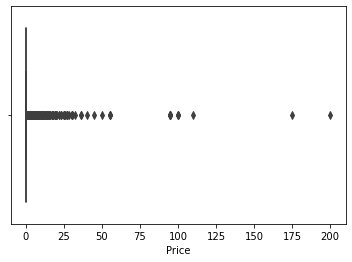

In [37]:
sns.boxplot(x=clean_games_df['Price'])
plt.show()

The boxplot of Price factor shows that most games are free. So there are outliers values in the price factor. Most outliers values are concentrated on the right side of the chart.
It also shows that there are a few games with a very high price. The price of $199.99 for one of the games is very high.

In [38]:
clean_games_df.Price.value_counts().sort_index()

0.00      115203
0.99        4171
1.99        2171
2.99        1386
3.99         553
4.99         618
5.99         157
6.99         199
7.99          65
8.99          27
9.99          85
10.99          4
11.99         16
12.99          8
13.99          7
14.99         22
15.99          2
16.99          6
17.99          8
18.99          2
19.99         15
21.99          2
22.99          3
24.99          6
25.99          1
26.99          7
27.99          1
29.99          5
31.99          1
35.99          2
39.99          1
44.99          1
49.99          1
54.99          3
94.99          5
99.99          3
109.99         1
174.99         1
199.99         1
Name: Price, dtype: int64

In [39]:
clean_games_df.query('Price > 99.99')

,Name_App,Developer,Age_Rating,Price,Purchases,Languages,Sub_Category,Release_Date,Rast_Version_Date,Version_Count,...,Cate_Games,Cate_Music,Cate_Puzzle,Cate_Racing,Cate_Role Playing,Cate_Simulation,Cate_Sports,Cate_Strategy,Cate_Trivia,Cate_Word
34615,Horror House Survival: Pr‪o‬,muhammadnabeel khan,17,109.99,0,English,Adventure,2018-06-18,2020-09-06,4.0,...,0,0,0,0,0,0,0,0,0,0
84695,BT: Make Your Puzzl‪e‬,Santiago Romani Castroman,4,199.99,0,English,Puzzle,2015-04-11,2017-04-15,2.0,...,0,0,1,0,0,0,0,0,0,0
167504,Noir‪.‬,Markus Mic,4,174.99,0,English,Casual,2018-05-29,2018-12-04,4.0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
clean_games_df= clean_games_df.loc[clean_games_df["Price"] <110]
clean_games_df.query('Price > 99.99')

,Name_App,Developer,Age_Rating,Price,Purchases,Languages,Sub_Category,Release_Date,Rast_Version_Date,Version_Count,...,Cate_Games,Cate_Music,Cate_Puzzle,Cate_Racing,Cate_Role Playing,Cate_Simulation,Cate_Sports,Cate_Strategy,Cate_Trivia,Cate_Word
34615,Horror House Survival: Pr‪o‬,muhammadnabeel khan,17,109.99,0,English,Adventure,2018-06-18,2020-09-06,4.0,...,0,0,0,0,0,0,0,0,0,0


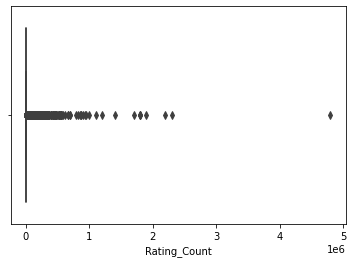

In [41]:
sns.boxplot(x=clean_games_df['Rating_Count'])
plt.show()

In [42]:
clean_games_df.query('Rating_Count > 3000000')

,Name_App,Developer,Age_Rating,Price,Purchases,Languages,Sub_Category,Release_Date,Rast_Version_Date,Version_Count,...,Cate_Games,Cate_Music,Cate_Puzzle,Cate_Racing,Cate_Role Playing,Cate_Simulation,Cate_Sports,Cate_Strategy,Cate_Trivia,Cate_Word
6761,Roblo‪x‬,Roblox Corporation,12,0.0,1,"English, French, German, Indonesian, Italian, ...",Action,2011-05-26,2021-02-25,25.0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis (EDA) 

## The EDA will analyze the dataset and take care to these questions:


## Q: what is the distribution of rating?

/Users/wejdanalsaadi/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


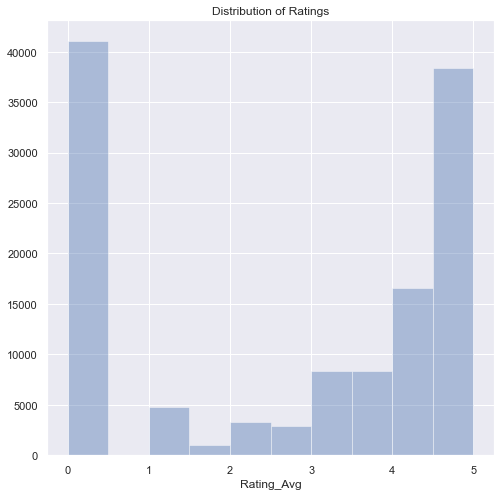

In [43]:

sns.set(rc={'figure.figsize':(8,8)})
sns.distplot(clean_games_df['Rating_Avg'],bins=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5],kde=False,).set_title('Distribution of Ratings');

From this figure, There are more than 40,000 games with a zero rating, and the second highest rating in range 4 to 5.

## Q: what are the distributions of rating games by each age rating?

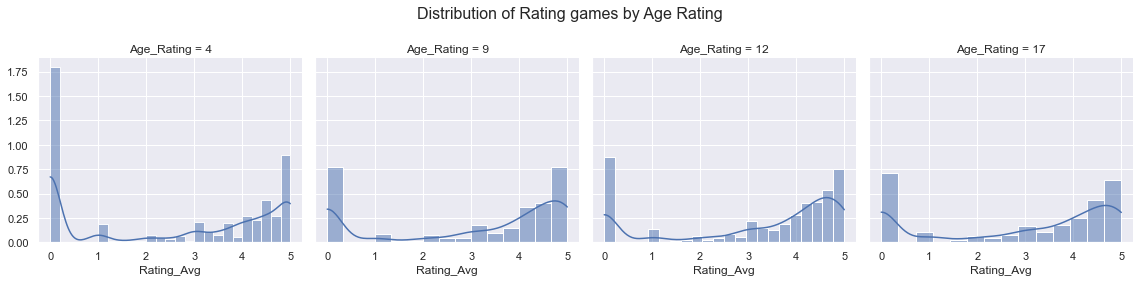

In [44]:
g = sns.FacetGrid(clean_games_df, col='Age_Rating', sharex=True, sharey=True, height=4)
g.map(sns.histplot, 'Rating_Avg',stat='density', kde=True);
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of Rating games by Age Rating',fontsize=16);

As shows, games with +4 age rating get the highest number of rating but a lot of games get zero rating.
Games with +17 age rating get the highest number of rating with few games get a zero rating.

## Q: what is the distributions of rating games by price?

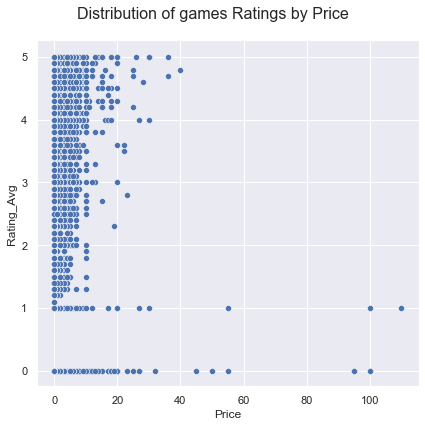

In [45]:
g = sns.pairplot(data=clean_games_df,y_vars=['Rating_Avg'],x_vars=['Price'] ,height=6);
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of games Ratings by Price',fontsize=16);

As shows, there ar alot of free games get highst ratings. This explains the lack of a linear relationship between valuation and price.

## Q: what are the distributions of rating rames by purchases in app?

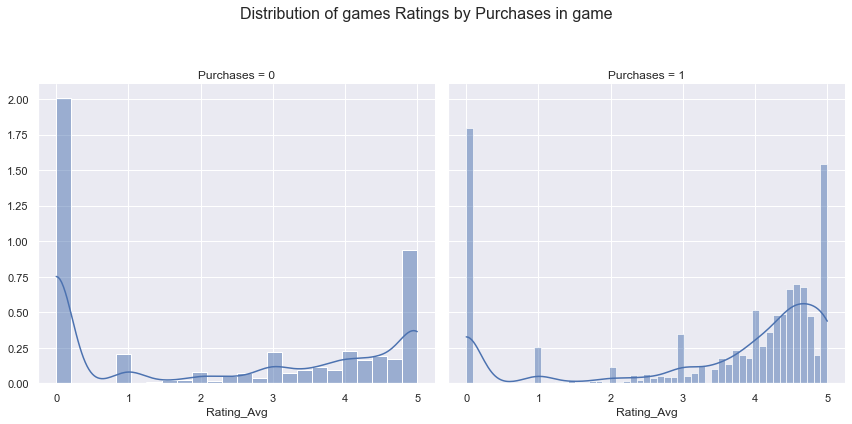

In [46]:
g = sns.FacetGrid(clean_games_df, col='Purchases', sharex=True, sharey=True, height=6)
g.map(sns.histplot, 'Rating_Avg',stat='density', kde=True);
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of games Ratings by Purchases in game',fontsize=16);

As shows, games where there are in-app purchases get a high number of ratings and high ratings

In [47]:
#g = sns.FacetGrid(clean_games_df, col='Num_small_devices', sharex=True, sharey=True, height=6)
#g.map(sns.histplot, 'Rating_Avg',stat='density', kde=True);

## Q: What are the Top 10 supported languages in the games

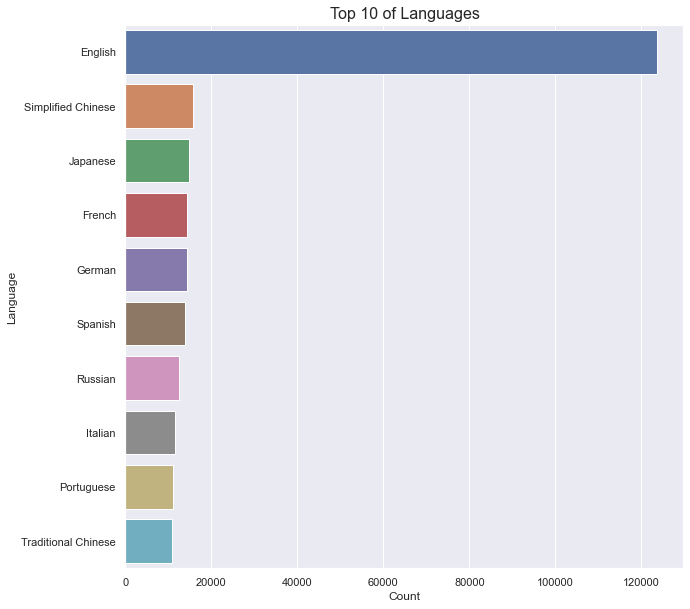

In [48]:
languages = pd.DataFrame(clean_games_df['Languages'].str.split(', ',expand=True))
languages = pd.DataFrame(languages.values.ravel(), columns = ["Languages"])
languages = pd.DataFrame(languages['Languages'].value_counts().reset_index())
languages.columns = ['Language', 'Count']
#languages['Rating_Avg']=clean_games_df['Rating_Avg']
plt.figure(figsize=[10,10])
g=sns.barplot(y='Language', x ='Count', data=languages.head(10));
g.set_title('Top 10 of Languages',fontsize=16);

English is the top supportive language in games, about 120,000 English-supporting games and about 4,000 games  don't support it.

In [49]:
clean_games_df['Sub_Category'].value_counts().sort_values(ascending=False)

Casual          18476
Puzzle          18437
Games           15980
Action          14264
Simulation       8520
Family           8241
Adventure        7089
Board            4846
Racing           4835
Trivia           3881
Sports           3667
Role Playing     3486
Strategy         3474
Word             3432
Card             3266
Casino           1563
Music            1311
Name: Sub_Category, dtype: int64

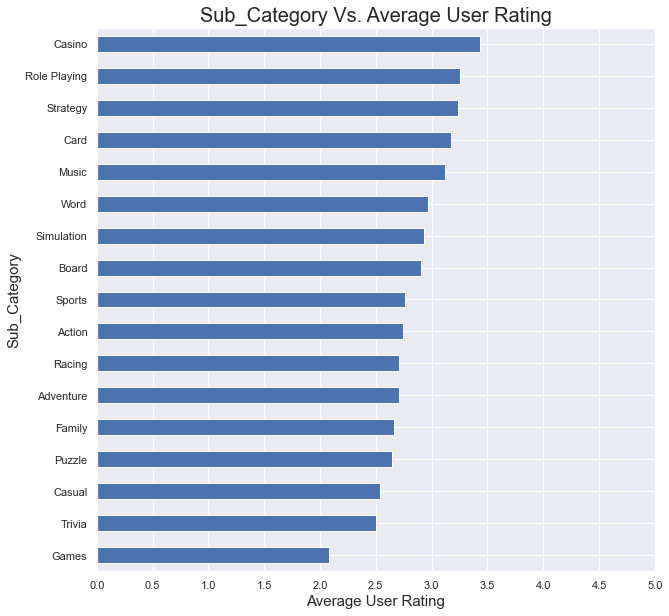

In [50]:
groupbyGenre_fd = clean_games_df.groupby("Sub_Category")["Rating_Avg"].mean().sort_values(ascending=True)
groupbyGenre_fd.plot.barh(figsize = [10,10]);
plt.xticks(np.arange(0, 5.5, 0.5))
plt.title('Sub_Category Vs. Average User Rating',fontsize = 20 )
plt.xlabel('Average User Rating',fontsize = 15)
plt.ylabel('Sub_Category',fontsize = 15);

### Top 10 Developer & thire Average_User_Rating by User_Rating_Count

In [51]:
top10_Developer=clean_games_df.nlargest(10, 'Rating_Count')[['Rating_Avg','Developer']]

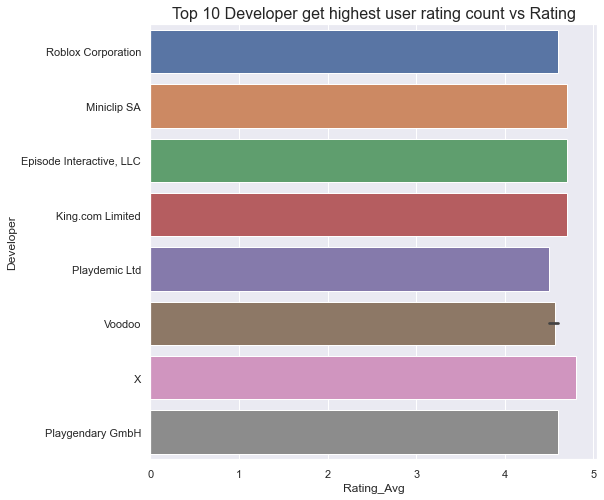

In [52]:
#sns.catplot(x = 'Average_User_Rating', data=top10_user_count, kind='count',color='lightblue');
g=sns.barplot(y="Developer", x="Rating_Avg", data=top10_Developer);
g.set_title('Top 10 Developer get highest user rating count vs Rating',fontsize=16);

In [53]:
display(clean_games_df.query("Developer=='X'")[['Name_App','Rating_Avg','Rating_Count',
                                                         'Price','Age_Rating','Sub_Category','Version_Count',
                                                          'LNGs_InApp','Size_B','Purchases','Num_small_devices']])

,Name_App,Rating_Avg,Rating_Count,Price,Age_Rating,Sub_Category,Version_Count,LNGs_InApp,Size_B,Purchases,Num_small_devices
11301,Aura Kingdo‪m‬,4.6,1300.0,0.0,12,Role Playing,13.0,1,999600000.0,1,3
33969,Tap10‪.‬,1.0,1.0,0.0,4,Racing,2.0,1,5000000.0,0,2
58531,SIHC HatTric‪k‬,0.0,0.0,0.0,17,Sports,7.0,1,244600000.0,0,3
93257,One Line One Stroke Mind Gam‪e‬,4.7,8200.0,0.0,4,Puzzle,25.0,13,170600000.0,1,3
150485,Odyssey Journe‪y‬,5.0,1.0,0.0,4,Adventure,1.0,1,24600000.0,0,3
169997,Happy Color™ – Coloring Game‪s‬,4.8,1800000.0,0.0,4,Board,25.0,19,392900000.0,1,3
171923,Gnomaz‪e‬,3.0,2.0,0.0,9,Action,2.0,1,87000000.0,0,3


In [54]:
display(clean_games_df.query("Developer=='Roblox Corporation'")[['Name_App','Rating_Avg','Rating_Count',
                                                         'Price','Age_Rating','Sub_Category','Version_Count',
                                                          'LNGs_InApp','Size_B','Purchases','Num_small_devices']])



,Name_App,Rating_Avg,Rating_Count,Price,Age_Rating,Sub_Category,Version_Count,LNGs_InApp,Size_B,Purchases,Num_small_devices
6761,Roblo‪x‬,4.6,4800000.0,0.0,12,Action,25.0,15,214800000.0,1,3


# Building Machine Learning Models

Now, building a models to predict Rating. My Target is Column `Rating_Avg`, this target is continuous values, so I going to using three regression models. 
* LinearRegression
* DecisionTreeRegressor
* RandomForestRegressor

Will build these models by using only numerical features. 
- Using StandardScaler from sklearn to make sure to scale features before fitting them. Standardisation rescales features between the range of 0 and 1.
- Using train_test_split to split the dataset to validate training set and testing evaluation set.
- Using K-Folds cross-validator to split  training set into k consecutive folds with shuffling then used once as validation while the k - 1 remaining folds are used to fit the training set.
- Using cross_val_score to evaluate a score by cross-validation
- Using  R2 Score to evaluate  the models and mean squared error (MSE) 

In [55]:
# Import libraries for models
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold,cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [56]:
# Exclude non-numerical features and drop null values 
games_df = clean_games_df.select_dtypes(exclude=['object']).copy()
games_df.dropna(inplace=True)
# print information of df
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124768 entries, 0 to 187903
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age_Rating         124768 non-null  int64  
 1   Price              124768 non-null  float64
 2   Purchases          124768 non-null  int64  
 3   Version_Count      124768 non-null  float64
 4   Rating_Avg         124768 non-null  float64
 5   Rating_Count       124768 non-null  float64
 6   LNGs_InApp         124768 non-null  int64  
 7   Size_B             124768 non-null  float64
 8   Num_small_devices  124768 non-null  int64  
 9   Cate_Adventure     124768 non-null  uint8  
 10  Cate_Board         124768 non-null  uint8  
 11  Cate_Card          124768 non-null  uint8  
 12  Cate_Casino        124768 non-null  uint8  
 13  Cate_Casual        124768 non-null  uint8  
 14  Cate_Family        124768 non-null  uint8  
 15  Cate_Games         124768 non-null  uint8  
 16  Ca

In [57]:
# Compute correlation for the target and other features 
games_df.corr()['Rating_Avg'].sort_values(ascending=False)

Rating_Avg           1.000000
Version_Count        0.293351
Purchases            0.272342
Size_B               0.126271
Age_Rating           0.093492
LNGs_InApp           0.072261
Cate_Role Playing    0.047245
Cate_Strategy        0.045641
Rating_Count         0.043732
Cate_Casino          0.041022
Cate_Card            0.039123
Cate_Simulation      0.033251
Cate_Word            0.023666
Cate_Music           0.022249
Cate_Board           0.021951
Num_small_devices    0.018186
Price                0.009049
Cate_Sports          0.007588
Cate_Adventure       0.003912
Cate_Racing          0.003605
Cate_Family         -0.001092
Cate_Puzzle         -0.006275
Cate_Trivia         -0.014583
Cate_Casual         -0.027713
Cate_Games          -0.109213
Name: Rating_Avg, dtype: float64

As shown, there are weak correlation between target and other features. As a result, LinearRegression's performance can be bad, but it's possible to get a good performance from Decision Tree Regressor and Random Forest Regressor.

In [58]:
# Brak dataset to X=all features to be used for training except "target", y=target variabl
X = games_df.drop(columns=['Rating_Avg']).values
y = games_df['Rating_Avg'].values

# Split dataset to 80% for training and 20% for testing
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#  Create the scaler with parameters as default
scaler = StandardScaler()
# Fit the scaler passing the trainset and transforms it 
X_scaled = scaler.fit_transform(X)
# Transform testset with the same fitted scaler to prevent data leakage.
X_test_scaled = scaler.transform(X_test)


## Linear Regression Model

In [59]:
# Creat Kfold with 5 splits and shuffle
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
# Creat Linear Regression model
LRmodel = LinearRegression()
# Print the average of cross-validation
print('Mean of r^2 to Linear Regression:',np.mean(cross_val_score(LRmodel, X_scaled, y, cv=kf, scoring='r2')))

Mean of r^2 to Linear Regression: 0.12875422107969736


* r^2 is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). 
* Here Linear Regression model get a low r^2 would show a low of correlation, meaning a Linear Regression model in this case is not good.


## Decision Tree Regressor Model

In [60]:
# Creat Kfold with 5 splits and shuffle
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
# Creat Decision Tree Regressor model
tree_model = DecisionTreeRegressor()
# Print the average of cross-validation
print('Mean of r^2 to Decision Tree Regressor:',np.mean(cross_val_score(tree_model, X_scaled, y, cv=kf, scoring='r2')))

Mean of r^2 to Decision Tree Regressor: 0.6455209795522879


Decision Tree Regressor Model get about 0.65 that is not very goot but also not bad as Linear Regression model 

## Random Forest Regressor Model

In [61]:
# Creat Kfold with 5 splits and shuffle
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
# Creat Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100)
# Print the average of cross-validation
print('Mean of r^2 to Random Forest Regressor:',np.mean(cross_val_score(rf_model,X_scaled, y,cv=kf,scoring='r2')))


Mean of r^2 to Random Forest Regressor: 0.7979443313755322


Random forest regressor model get about  0.8 that is better than decision tree regressor model.

As shown the better model get high r^2 is random forest regressor model. 
* What about number of trees (estimator) in the forest? 

Now I am going to change the number of estimator from 50 to 300 with step equal 50 and display the best estimator.

In [62]:
#n_estimators change
# search for an optimal value of K for KNN
estimators = np.arange(50, 300, 50)
mse_list = []
r2_list = []
for i in estimators:
    rf_model = RandomForestRegressor()
    rf_model.set_params(n_estimators=i)
    rf_model.fit(X_scaled, y)
    y_pre=rf_model.predict(X_test_scaled)
    r2_list.append(rf_model.score(X_test_scaled,y_test))
    mse_list.append(mean_squared_error(y_test, y_pre))

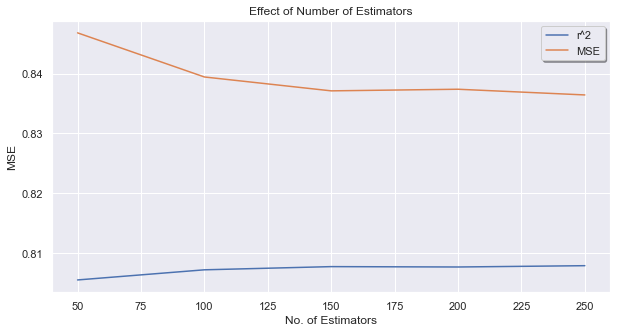

In [63]:
plt.figure(figsize=(10, 5))
plt.xlabel("No. of Estimators")
plt.ylabel("MSE")
plt.title("Effect of Number of Estimators")
plt.plot(estimators, r2_list)
plt.plot(estimators, mse_list)
plt.legend(['r^2','MSE'],shadow = True, loc = 0);

From this graph note  is the best estetor was 150, highest r^2 and the lowest Mean square error.
- Mean square error (MSE) is the average of the square of the errors.


Now will fitting the random forest regressor model with estimator equal 150 and predict testset.

In [64]:
# fitting trainset
rf_model.set_params(n_estimators=150)
rf_model.fit(X_scaled, y)
# predict test set
y_pre=rf_model.predict(X_test_scaled)
# print r^2 to testset
print("r^2 of testset to Random Forest Regressor:",rf_model.score(X_test_scaled,y_test))

r^2 of testset to Random Forest Regressor: 0.8077259174050988


As shown, we get r^2 of testset the same as in trainset

In [65]:
rf_mse = mean_squared_error(y_test, y_pre)
print("Mean squared error to Random Forest Regressor:",rf_mse)

Mean squared error to Random Forest Regressor: 0.8370718782479533


### save model

In [66]:
from joblib import dump , load
joblib.dump(rf_mse, 'rf_model.pkl')

# Thanks